# C.5.1 결측값 50% 초과 변수 제거

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('2014DC1.csv')
df.head(3)

,Year,Area,IndCategory1,IndCategory2,CompanyID,StockMktListing,Emp_total,Emp_male,Emp_female,emp1,emp2,emp3,emp4,emp5,emp6,emp7,emp8,emp9,emp10,emp11,emp12,emp13,emp14,emp15,emp16,emp17,emp18,emp19,emp20,emp21,emp22,emp23,emp24,emp25,emp26,emp27,emp28,emp29,emp30,emp31,emp32,emp33,emp34,emp35,emp36,emp37,emp38,emp39,emp40,emp41,emp42,emp43,emp44,emp45,emp46,emp47,emp48,emp49,emp50,emp51,emp52,emp53,emp54,emp55,emp56,emp57,emp58,emp59,emp60,emp61,emp62,emp63,emp64,emp65,emp66,emp67,emp68,emp69,emp70,emp71,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC7,TAssetC8,ITAssetC,Patent1,Patent2,Patent3,UMR1,UMR2,UMR3,Design1,Design2,Design3,TradeMark1,TradeMark2,TradeMark3,Subsidiary1,Subsidiary2,Subsidiary3,Subsidiary4,Subsidiary5,ParentCompany1,ParentCompany2,ParentCompany3,ParentCompany4,B2B_revenue,B2B_export1,B2B_export2,B2B_purchase1,B2B_purchase2,B2B_import1,B2B_import2,OutsourcingCost,RNDcost1,RNDcost2,RNDcost3,RNDcost4,RNDcost5,Outsourcing1,Outsourcing2,Outsourcing3,Outsourcing4,Outsourcing5,Outsourcing6,Outsourcing7,Outsourcing8,Outsourcing9,Outsourcing10,Outsourcing11,Outsourcing12,Outsourcing13,EBizSystem2,EBizSystem3,EBizSystem4,EBizSystem5,EBizSystem6,EBizSystem7,EBizSystem8,EBizSystem9,EBizSystem10,Franchise1,Franchise2,Overseas1,Overseas2,Overseas3,Overseas4,Overseas5,Overseas6,Overseas7,Overseas8,Overseas9,NewEntry3,NewEntry1,NewEntry2,SAlliance1,SAlliance2,SAlliance3,SAlliance4,SAlliance5,SAlliance6,SAlliance7,SAlliance8,SAlliance9,SAlliance10,SAlliance11,SAlliance12,SAlliance13,SAlliance14,SAlliance15,SAlliance16,SAlliance17,SAlliance18,SAlliance19,SAlliance20,SAlliance21,SAlliance22,SAlliance23,SAlliance24,SAlliance25,SAlliance26,SAlliance27,SAlliance28,SAlliance29,SAlliance30,SAlliance31,SAlliance32,SAlliance33,SAlliance34,SAlliance35,SAlliance36,SAlliance37,SAlliance38,SAlliance39,SAlliance40,SAlliance41,SAlliance42,SAlliance43,Compensation1,Compensation2,Compensation3,Compensation4,EquityShareCapital,Asset1,Asset2,Asset3,Asset4,Asset5,Asset6,Asset7,Asset8,Asset9,Liability1,Liability2,Liability3,Capital1,Capital2,RevProfit1,Cost1,Cost2,RevProfit2,Cost3,NProfitB4Tax,Cost4,Cost5,Cost6,Cost7,Cost8,Cost9,Cost10,Cost11,Cost12,Cost13,Cost14,Cost15,Cost16,Cost17,EBIZSystem2005_1,EBIZSystem2005_2,EBIZSystem2005_3,EBIZSystem2005_4,EBIZSystem2005_5,EBIZSystem2005_6,EBIZSystem2005_7,EBIZSystem2005_8,EBIZSystem2005_9,EBIZSystem2005_10,CapitalRatio1,EBizSystem11,EBizSystem12
0,2014,11,A,3,2376132235,1,238,197.0,41.0,0.0,39,34.0,5.0,NaN,39,34.0,5.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,163.0,36.0,0.0,29.0,6.0,23.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,40.0,13.0,NaN,117.0,117.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,466.0,0.0,0.0,0.0,0.0,98.0,12.0,356.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,3.0,4202.0,7671.0,2,NaN,NaN,NaN,6662.0,53458.0,6662.0,31753.0,13017.0,13017.0,13017.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,NaN,1,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,20298.0,97771,20851,24174.0,NaN,NaN,NaN,13017.0,29283.0,543.0,64572,25004.0,39568.0,33199,13336.0,104784,107885,8581,7920,4289,-8051,116466.0,60171.0,NaN,NaN,13342,210,2748,476.0,13.0,24.0,39482,4289.0,1848.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,0
1,2014,11,A,3,4996132235,1,554,521.0,33.0,255.0,544,516.0,28.0,255.0,158,130.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386.0,386.0,NaN,255.0,10.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,130.0,0.0,0.0,0.0,0.0,0.0,42.0,88.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,5.0,5.0,NaN,1,4.0,6.0,12741.0,17590.0,2,NaN,NaN,NaN,NaN,7142

In [2]:
df.shape

(12417, 254)

In [6]:
df.isnull().any().sum()   # NaN을 포함한 변수가 193개임

193

In [7]:
# 2006-2014파일은 이미 Data Cleaning 되어 있지만, 혹시 White Space가 있는지 확인하려고 다음 작업을 시도
# df (여기서는 2014자료) 전역에 걸쳐서 혹시나 있을 White Space 값을 NaN값으로 바꾸기

df = df.replace(r'^\s*$', np.nan, regex=True)
df.isnull().any().sum()   # NaN값을 포함함 컬럼 갯수는 193개로 이전과 동일

193

In [8]:
# 이제 모든 컬럼의 Null값 보유 비율을 확인. 
# 다만, 데이터클리닝 시 Null값 비율이 많은 컬럼들이 필요한 게 아니고 해당 비율이 적은 컬럼들이 필요해서
# 명령어를 isnull()에서 notnull()로 바꿈

df.notnull().mean().sort_values(ascending=False)

EBizSystem12          1.000000
Asset2                1.000000
Outsourcing13         1.000000
EBizSystem2           1.000000
EBizSystem3           1.000000
EBizSystem4           1.000000
EBizSystem5           1.000000
EBizSystem6           1.000000
EBizSystem7           1.000000
EBizSystem8           1.000000
EBizSystem9           1.000000
EBizSystem10          1.000000
Franchise1            1.000000
Overseas1             1.000000
NewEntry3             1.000000
SAlliance1            1.000000
Compensation1         1.000000
Compensation2         1.000000
Compensation3         1.000000
Compensation4         1.000000
EquityShareCapital    1.000000
Outsourcing12         1.000000
Outsourcing11         1.000000
Outsourcing10         1.000000
Subsidiary1           1.000000
Area                  1.000000
IndCategory1          1.000000
IndCategory2          1.000000
CompanyID             1.000000
StockMktListing       1.000000
Emp_total             1.000000
emp2                  1.000000
emp6    

In [9]:
# null value 비율이 50% 이하인 변수만 모아서 새롭게 데이터프레임 df1 형성
# 변수명이 길게 주욱 나열되는 경우, 별도로 변수명만 모아서 아래처럼 cols라는 임시저장소에 넣어두면 편리함

cols = ['EBizSystem12','Asset2','Outsourcing13','EBizSystem2','EBizSystem3','EBizSystem4','EBizSystem5',\
        'EBizSystem6','EBizSystem7','EBizSystem8','EBizSystem9','EBizSystem10','Franchise1','Overseas1','NewEntry3',\
        'SAlliance1','Compensation1','Compensation2','Compensation3','Compensation4','EquityShareCapital',\
        'Outsourcing12','Outsourcing11','Outsourcing10','Subsidiary1','Area','IndCategory1','IndCategory2',\
        'CompanyID','StockMktListing','Emp_total','emp2','emp6','ParentCompany1','Outsourcing9','Outsourcing1',\
        'Outsourcing2','Outsourcing3','Outsourcing4','EBizSystem11','Outsourcing6', 'Outsourcing7','Outsourcing8',\
        'Asset1','Outsourcing5','Year','Liability1','Capital1','RevProfit1','Cost1','Cost2','RevProfit2','Cost3',\
        'NProfitB4Tax','Cost4','Cost8','Cost9','Cost10','Cost14','Liability2','CapitalRatio1','Emp_male','Cost11',\
        'Cost12','emp3','Cost13','Cost17','TAssetC7','TAssetC1','Asset8','TAssetC5','TAssetC6','TAssetC4',\
        'Emp_female','TAssetC8','TAssetC3','emp7','TAssetC2','emp4','ITAssetC','emp8','Cost15','Cost5','Cost16',\
        'Patent1','TradeMark1','Design1','UMR1','Liability3','emp66','Asset7','Asset3','B2B_purchase1','Asset9',\
        'Overseas5','OutsourcingCost','RNDcost1']        
        
df1 = df[cols]                 # cols라는 임시저장소에 모아둔 변수들로만 구성된 데이터프레임을 만들고 df1으로 명명
df1 = df1.sort_index(axis=1)   # 변수명을 알파벳 순서대로 재배열
df1.head(3)

,Area,Asset1,Asset2,Asset3,Asset7,Asset8,Asset9,B2B_purchase1,Capital1,CapitalRatio1,CompanyID,Compensation1,Compensation2,Compensation3,Compensation4,Cost1,Cost10,Cost11,Cost12,Cost13,Cost14,Cost15,Cost16,Cost17,Cost2,Cost3,Cost4,Cost5,Cost8,Cost9,Design1,EBizSystem10,EBizSystem11,EBizSystem12,EBizSystem2,EBizSystem3,EBizSystem4,EBizSystem5,EBizSystem6,EBizSystem7,EBizSystem8,EBizSystem9,Emp_female,Emp_male,Emp_total,EquityShareCapital,Franchise1,ITAssetC,IndCategory1,IndCategory2,Liability1,Liability2,Liability3,NProfitB4Tax,NewEntry3,Outsourcing1,Outsourcing10,Outsourcing11,Outsourcing12,Outsourcing13,Outsourcing2,Outsourcing3,Outsourcing4,Outsourcing5,Outsourcing6,Outsourcing7,Outsourcing8,Outsourcing9,OutsourcingCost,Overseas1,Overseas5,ParentCompany1,Patent1,RNDcost1,RevProfit1,RevProfit2,SAlliance1,StockMktListing,Subsidiary1,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC7,TAssetC8,TradeMark1,UMR1,Year,emp2,emp3,emp4,emp6,emp66,emp7,emp8
0,11,97771,20851,24174.0,13017.0,29283.0,543.0,31753.0,33199,0.0,2376132235,1.0,1.0,1.0,1.0,107885,2748,476.0,13.0,24.0,39482,4289.0,1848.0,26.0,8581,4289,116466.0,60171.0,13342,210,NaN,0,0,0,1,0,0,0,0,0,0,0,41.0,197.0,238,20298.0,2,0.0,A,3,64572,25004.0,39568.0,-8051,2,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,NaN,2,NaN,NaN,104784,7920,2,1,1,466.0,0.0,0.0,0.0,0.0,98.0,12.0,356.0,NaN,NaN,2014,39,34.0,5.0,39,0.0,34.0,5.0
1,11,505485,130105,32225.0,199153.0,87920.0,11557.0,132689.0,427807,0.0,4996132235,1.0,1.0,1.0,1.0,198725,5023,1221.0,11.0,-110.0,75459,4403.0,1119.0,1162.0,50205,4403,248930.0,135275.0,30787,1264,0.0,0,0,0,1,0,0,0,0,0,0,0,33.0,521.0,554,8000.0,2,0.0,A,3,77678,57811.0,19867.0,26293,2,1,0,0,0,0,0,0,0,0,0,0,0,0,164.0,1,NaN,2,0.0,NaN,253673,25953,2,1,1,130.0,0.0,0.0,0.0,0.0,0.0,42.0,88.0,5.0,0.0,2014,544,516.0,28.0,158,0.0,130.0,28.0
2,11,78333,10886,23629.0,19362.0,17019.0,24.0,35775.0,18809,0.0,9020122135,1.0,5.0,2.0,1.0,95945,1101,484.0,2.0,-3.0,46737,3126.0,1462.0,33.0,4871,3126,100816.0,35926.0,16569,0,1.0,0,0,0,1,0,0,0,0,0,0,0,7.0,129.0,136,2800.0,2,0.0,A,3,59524,57506.0,2018.0,2784,2,0,0,0,0,0,1,0,0,1,0,1,0,0,0.0,1,NaN,2,2.0,NaN,103081,3645,2,3,1,306.0,117.0,1.0,0.0,156.0,17.0,15.0,0.0,25.0,0.0,2014,51,44.0,7.0,51,0.0,44.0,7.0


In [10]:
df1.shape

(12417, 97)

In [12]:
df1.drop(['CompanyID','Year'], axis=1, inplace=True)   # 변수를 데이터프레임에서 제거

In [13]:
df1.shape

(12417, 95)

# C.5.2 요약통계 및 도수분포표 검토

In [14]:
df1.describe(include=[np.number])   # 숫자형 변수의 요약통계 출력

,Area,Asset1,Asset2,Asset3,Asset7,Asset8,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Compensation1,Compensation2,Compensation3,Compensation4,Cost1,Cost10,Cost11,Cost12,Cost13,Cost14,Cost15,Cost16,Cost17,Cost2,Cost3,Cost4,Cost5,Cost8,Cost9,Design1,EBizSystem10,EBizSystem11,EBizSystem12,EBizSystem2,EBizSystem3,EBizSystem4,EBizSystem5,EBizSystem6,EBizSystem7,EBizSystem8,EBizSystem9,Emp_female,Emp_male,Emp_total,EquityShareCapital,Franchise1,ITAssetC,IndCategory2,Liability1,Liability2,Liability3,NProfitB4Tax,NewEntry3,Outsourcing1,Outsourcing10,Outsourcing11,Outsourcing12,Outsourcing13,Outsourcing2,Outsourcing3,Outsourcing4,Outsourcing5,Outsourcing6,Outsourcing7,Outsourcing8,Outsourcing9,OutsourcingCost,Overseas1,Overseas5,ParentCompany1,Patent1,RNDcost1,RevProfit1,RevProfit2,SAlliance1,StockMktListing,Subsidiary1,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC7,TAssetC8,TradeMark1,UMR1,emp2,emp3,emp4,emp6,emp66,emp7,emp8
count,12417.000000,1.241700e+04,1.241700e+04,9.955000e+03,1.088900e+04,1.238900e+04,8.896000e+03,9.170000e+03,1.241700e+04,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,1.241700e+04,1.241700e+04,12415.000000,1.241200e+04,1.240900e+04,1.241700e+04,1.217200e+04,12167.000000,12407.000000,1.241700e+04,1.241700e+04,1.241700e+04,1.217100e+04,1.241700e+04,12417.000000,11920.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12371.000000,12415.000000,12417.000000,1.241700e+04,12417.000000,1.230100e+04,12417.000000,1.241700e+04,1.241700e+04,1.154600e+04,1.241700e+04,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,12417.000000,7.741000e+03,12417.000000,8765.0,12417.000000,12166.000000,6.995000e+03,1.241700e+04,1.241700e+04,12417.000000,12417.000000,12417.000000,1.240100e+04,12365.000000,12370.000000,12372.000000,1.238900e+04,1.238200e+04,1.240100e+04,1.237000e+04,12021.000000,11907.000000,12417.000000,12411.000000,12339.000000,12417.000000,11070.000000,12369.000000,12247.000000
mean,23.480309,4.525340e+05,5.544885e+04,1.933366e+04,5.099461e+04,7.188469e+04,8.131791e+03,1.273268e+05,1.353820e+05,8.910284,1.202142,1.404123,3.529838,3.337118,1.784217e+05,7.359765e+03,833.754732,1.739601e+03,1.163509e+03,4.886607e+04,8.483780e+03,1942.697460,212.507939,3.135980e+04,8.499485e+03,2.097815e+05,9.822014e+04,1.997863e+04,2119.735524,6.814933,0.035033,0.325360,0.528872,0.571636,0.056133,0.038737,0.086253,0.110574,0.085206,0.051140,0.065797,89.498343,218.068949,307.200612,1.989338e+04,1.967867,1.464661e+03,41.771523,3.171520e+05,2.811741e+05,7.191032e+04,9.616940e+03,1.971491,0.245953,0.171056,0.103004,0.028831,0.046549,0.290650,0.094226,0.050415,0.034952,0.063461,0.320287,0.362648,0.070307,2.106404e+04,1.726423,1.0,1.768543,27.431284,5.999326e+03,2.196625e+05,8.235444e+03,1.915197,2.817911,1.597890,1.088431e+04,1044.226203,1554.891431,399.025703,5.127931e+03,7.739872e+02,1.643400e+03,3.557384e+02,22.582813,1.001512,166.503262,120.076706,46.778426,63.154063,30.279946,46.342873,17.226178
std,10.229595,5.848485e+06,6.109537e+05,1.366457e+05,6.583778e+05,7.610162e+05,8.862248e+04,1.056699e+06,1.575292e+06,26.716112,0.757194,1.139162,1.661398,1.836346,1.476358e+06,1.204811e+05,6098.548567,2.603691e+04,2.016828e+04,7.086858e+05,7.865597e+04,13770.714946,3408.480931,3.410181e+05,7.794738e+04,1.715518e+06,8.769269e+05,1.540571e+05,16323.347550,107.031656,0.183870,0.468528,0.978831,0.494862,0.230187,0.192976,0.280748,0.313617,0.279199,0.220291,0.247937,511.131687,1170.237284,1545.560871,1.476423e+05,0.176361,2.694482e+04,20.669163,5.070410e+06,5.041231e+06,6.994414e+05,1.875854e+05,0.166429,0.430668,0.376573,0.303976,0.167339,0.210679,0.454081,0.292154,0.218808,0.183666,0.243801,0.466605,0.480784,0.255674,1.855081e+05,0.445812,0.0,0.421781,546.055379,1.709942e+05,1.830442e+06,1.023909e+05,0.27

In [15]:
# dtype을 category로 지정해 줄 변수들을 cols1에 임시 저장
cols1 = ['Area', 'Compensation1', 'Compensation2', 'Compensation3', 'Compensation4', 'EBizSystem2','EBizSystem3',\
        'EBizSystem4','EBizSystem5','EBizSystem6','EBizSystem7','EBizSystem8','EBizSystem9','EBizSystem10',\
        'EBizSystem11','EBizSystem12','Franchise1','IndCategory1', 'IndCategory2','NewEntry3',\
        'Outsourcing1', 'Outsourcing2', 'Outsourcing3', 'Outsourcing4', 'Outsourcing5', 'Outsourcing6',\
        'Outsourcing7','Outsourcing8', 'Outsourcing9', 'Outsourcing10', 'Outsourcing11', 'Outsourcing12',\
        'Outsourcing13','Overseas1','Overseas5','ParentCompany1','SAlliance1','StockMktListing','Subsidiary1']

df1[cols1] = df1[cols1].astype('category')   # cols에 저장된 변수들의 dtype을 category로 변경

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)   # 실수형 변수의 자릿수를 소수점 두자리로 제한   
df1.describe(include=[np.number])   # 숫자형 변수의 요약통계량 출력 

,Asset1,Asset2,Asset3,Asset7,Asset8,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost10,Cost11,Cost12,Cost13,Cost14,Cost15,Cost16,Cost17,Cost2,Cost3,Cost4,Cost5,Cost8,Cost9,Design1,Emp_female,Emp_male,Emp_total,EquityShareCapital,ITAssetC,Liability1,Liability2,Liability3,NProfitB4Tax,OutsourcingCost,Patent1,RNDcost1,RevProfit1,RevProfit2,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC7,TAssetC8,TradeMark1,UMR1,emp2,emp3,emp4,emp6,emp66,emp7,emp8
count,12417.00,12417.00,9955.00,10889.00,12389.00,8896.00,9170.00,12417.00,12417.00,12417.00,12417.00,12415.00,12412.00,12409.00,12417.00,12172.00,12167.00,12407.00,12417.00,12417.00,12417.00,12171.00,12417.00,12417.00,11920.00,12371.00,12415.00,12417.00,12417.00,12301.00,12417.00,12417.00,11546.00,12417.00,7741.00,12166.00,6995.00,12417.00,12417.00,12401.00,12365.00,12370.00,12372.00,12389.00,12382.00,12401.00,12370.00,12021.00,11907.00,12417.00,12411.00,12339.00,12417.00,11070.00,12369.00,12247.00
mean,452533.97,55448.85,19333.66,50994.61,71884.69,8131.79,127326.82,135381.96,8.91,178421.72,7359.77,833.75,1739.60,1163.51,48866.07,8483.78,1942.70,212.51,31359.80,8499.48,209781.52,98220.14,19978.63,2119.74,6.81,89.50,218.07,307.20,19893.38,1464.66,317152.01,281174.12,71910.32,9616.94,21064.04,27.43,5999.33,219662.50,8235.44,10884.31,1044.23,1554.89,399.03,5127.93,773.99,1643.40,355.74,22.58,1.00,166.50,120.08,46.78,63.15,30.28,46.34,17.23
std,5848485.06,610953.72,136645.74,658377.82,761016.23,88622.48,1056699.35,1575292.37,26.72,1476357.81,120481.09,6098.55,26036.91,20168.28,708685.77,78655.97,13770.71,3408.48,341018.15,77947.38,1715518.35,876926.88,154057.13,16323.35,107.03,511.13,1170.24,1545.56,147642.34,26944.82,5070409.81,5041230.73,699441.43,187585.40,185508.10,546.06,170994.22,1830441.94,102390.86,143794.53,10517.56,18012.58,8374.61,97207.07,25385.37,18927.87,78203.37,182.40,11.09,526.90,385.03,195.83,210.95,223.61,158.90,64.07
min,80.00,0.00,0.00,-180.00,0.00,-116.00,0.00,-2298510.00,0.00,0.00,0.00,-5427.00,0.00,-83516.00,-94499.00,0.00,0.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,300.00,-203.00,0.00,0.00,-17017.00,-2337152.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5368322.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
25%,11221.00,3156.00,492.50,248.00,1581.00,31.00,3613.25,3843.00,0.00,8077.00,225.00,58.00,1.00,0.00,2329.00,183.00,22.00,0.00,2133.00,183.00,12822.00,667.00,2972.00,36.00,0.00,9.00,47.00,68.00,1000.00,0.00,5334.00,3439.00,869.25,54.00,269.00,0.00,97.00,13187.00,158.00,87.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,0.00,0.00,49.00,30.00,7.00,12.00,0.00,8.00,3.00
50%,30185.00,8846.00,2730.00,1252.00,7705.00,265.50,13922.50,12168.00,0.00,22536.00,728.00,137.00,10.00,2.00,5895.00,642.00,221.00,2.00,4619.00,644.00,29350.00,9898.00,5309.00,153.00,0.00,21.00,80.00,109.00,2313.00,0.00,14560.00,10456.00,3011.00,762.00,1680.00,0.00,392.00,30717.00,537.00,588.00,0.00,0.00,0.00,23.00,2.00,70.00,0.00,0.00,0.00,83.00,60.00,15.00,24.00,0.00,17.00,6.00
75%,83756.00,25202.00,9082.50,7404.00,23955.00,1563.00,43607.00,40138.00,0.00,63312.00,1979.00,322.00,115.00,67.00,16956.00,2268.50,774.00,19.00,11638.00,2300.00,77639.00,35893.00,11227.00,549.00,0.00,52.00,160.00,213.00,6400.00,84.00,39711.00,29022.00,9837.75,3613.00,6763.00,6.00,1252.00,81530.00,1937.00,2941.00,0.00,59.75,0.00,591.00,63.00,363.00,0.00,6.00,0.00,151.00,112.00,38.00,51.00,1.00,38.00,12.00
max,271252645.00,53491088.00,5553834.00,50159987.00,43744259.00,3234405.00,39065683.00,132677075.00,100.00,99188713.00,10110890.00,279908.00,2486393.00,1098227.00,69935085.00,4440774.00,582353.00,315752.00,24711840.00,4440774.00,123900553.00,39743499.00,11660439.00,543114.00,8094.00,26596.00,71375.00,97971.00,9028327.00,1656330.00,249407207.00,249407207.00,25016644.00,17280641.00,9490764.00,41096.00,13755937.00,137825547.00,7796421.00,12057791.00,590179.00,877676.00,585105.00,6339109.00,2235065.00,1272448.00,4340717.00,11947.00,921.00,24549.00,22301.00,9806.00,6846.00,9654.00,520

In [17]:
df1.skew(axis=0, numeric_only=True) 

Asset1                33.14
Asset2                60.55
Asset3                22.52
Asset7                48.56
Asset8                36.98
Asset9                23.96
B2B_purchase1         21.62
Capital1              54.56
CapitalRatio1          2.91
Cost1                 33.44
Cost10                56.99
Cost11                24.58
Cost12                73.42
Cost13                34.65
Cost14                79.29
Cost15                27.89
Cost16                21.49
Cost17                68.07
Cost2                 48.67
Cost3                 28.09
Cost4                 37.75
Cost5                 27.62
Cost8                 45.58
Cost9                 19.16
Design1               50.25
Emp_female            24.90
Emp_male              36.49
Emp_total             33.01
EquityShareCapital    28.80
ITAssetC              42.33
Liability1            37.13
Liability2            37.76
Liability3            22.13
NProfitB4Tax          67.67
OutsourcingCost       29.11
Patent1             

In [18]:
df1.kurtosis(axis=0, numeric_only=True) 

Asset1               1281.73
Asset2               4874.58
Asset3                642.55
Asset7               3259.33
Asset8               1810.10
Asset9                680.01
B2B_purchase1         577.01
Capital1             4172.33
CapitalRatio1           6.79
Cost1                1798.19
Cost10               4222.70
Cost11                822.27
Cost12               6744.30
Cost13               1494.13
Cost14               7640.65
Cost15               1135.76
Cost16                619.40
Cost17               5988.67
Cost2                3002.84
Cost3                1154.41
Cost4                2301.82
Cost5                 956.31
Cost8                2936.47
Cost9                 453.06
Design1              3199.63
Emp_female            905.36
Emp_male             1841.65
Emp_total            1642.47
EquityShareCapital   1323.03
ITAssetC             2082.61
Liability1           1563.76
Liability2           1601.25
Liability3            595.34
NProfitB4Tax         5919.74
OutsourcingCos

In [19]:
df1['StockMktListing'].value_counts(dropna=False)

3    10770
2      919
1      690
4       38
Name: StockMktListing, dtype: int64

In [20]:
pd.crosstab(df1['StockMktListing'], columns='count')   # frequency table 생성(개수 기준)

col_0,count
StockMktListing,
1,690
2,919
3,10770
4,38


In [16]:
pd.crosstab(df1['StockMktListing'], columns='count', normalize=True)   
                                                     # frequency table 생성(비율 기준)

col_0,count
StockMktListing,
1,0.06
2,0.07
3,0.87
4,0.00


In [21]:
pd.crosstab(df1['StockMktListing'], df1['EBizSystem2'])   # frequency table 생성(개수 기준)

EBizSystem2,0,1
StockMktListing,,
1,103,587
2,158,761
3,5046,5724
4,12,26


In [22]:
pd.crosstab(df1['StockMktListing'], df1['EBizSystem2'], normalize=True) 
                                                       # frequency table 생성(비율 기준)

EBizSystem2,0,1
StockMktListing,,
1,0.01,0.05
2,0.01,0.06
3,0.41,0.46
4,0.00,0.00


# C.5.3 이상값(outlier) 제거

In [23]:
# 참조 코딩
df1.shape

(12417, 95)

In [24]:
df2 = df1.drop(cols1, axis=1)   # 결측값 비율이 50% 미만인 interval 변수만 모은 df2 생성 (변수 개수: 56)
df2.shape

(12417, 56)

In [25]:
# 참조 코딩
df2.to_csv('2014DC1_interval.csv', index=False)  # 결측값 비율이 50% 미만인 interval 변수 56개 저장.

In [1]:
# 참조 코딩
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df2 = pd.read_csv('2014DC1_interval.csv')
df2.head(3)

,Asset1,Asset2,Asset3,Asset7,Asset8,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost10,Cost11,Cost12,Cost13,Cost14,Cost15,Cost16,Cost17,Cost2,Cost3,Cost4,Cost5,Cost8,Cost9,Design1,Emp_female,Emp_male,Emp_total,EquityShareCapital,ITAssetC,Liability1,Liability2,Liability3,NProfitB4Tax,OutsourcingCost,Patent1,RNDcost1,RevProfit1,RevProfit2,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC7,TAssetC8,TradeMark1,UMR1,emp2,emp3,emp4,emp6,emp66,emp7,emp8
0,97771,20851,24174.0,13017.0,29283.0,543.0,31753.0,33199,0.0,107885,2748,476.0,13.0,24.0,39482,4289.0,1848.0,26.0,8581,4289,116466.0,60171.0,13342,210,NaN,41.0,197.0,238,20298.0,0.0,64572,25004.0,39568.0,-8051,NaN,NaN,NaN,104784,7920,466.0,0.0,0.0,0.0,0.0,98.0,12.0,356.0,NaN,NaN,39,34.0,5.0,39,0.0,34.0,5.0
1,505485,130105,32225.0,199153.0,87920.0,11557.0,132689.0,427807,0.0,198725,5023,1221.0,11.0,-110.0,75459,4403.0,1119.0,1162.0,50205,4403,248930.0,135275.0,30787,1264,0.0,33.0,521.0,554,8000.0,0.0,77678,57811.0,19867.0,26293,164.0,0.0,NaN,253673,25953,130.0,0.0,0.0,0.0,0.0,0.0,42.0,88.0,5.0,0.0,544,516.0,28.0,158,0.0,130.0,28.0
2,78333,10886,23629.0,19362.0,17019.0,24.0,35775.0,18809,0.0,95945,1101,484.0,2.0,-3.0,46737,3126.0,1462.0,33.0,4871,3126,100816.0,35926.0,16569,0,1.0,7.0,129.0,136,2800.0,0.0,59524,57506.0,2018.0,2784,0.0,2.0,NaN,103081,3645,306.0,117.0,1.0,0.0,156.0,17.0,15.0,0.0,25.0,0.0,51,44.0,7.0,51,0.0,44.0,7.0


In [28]:
# 참조 코딩
df2.shape

(12417, 56)

In [29]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Asset1               72535.00
Asset2               22046.00
Asset3                8590.00
Asset7                7156.00
Asset8               22374.00
Asset9                1532.00
B2B_purchase1        39993.75
Capital1             36295.00
CapitalRatio1            0.00
Cost1                55235.00
Cost10                1754.00
Cost11                 264.00
Cost12                 114.00
Cost13                  67.00
Cost14               14627.00
Cost15                2085.50
Cost16                 752.00
Cost17                  19.00
Cost2                 9505.00
Cost3                 2117.00
Cost4                64817.00
Cost5                35226.00
Cost8                 8255.00
Cost9                  513.00
Design1                  0.00
Emp_female              43.00
Emp_male               113.00
Emp_total              145.00
EquityShareCapital    5400.00
ITAssetC                84.00
Liability1           34377.00
Liability2           25583.00
Liability3            8968.50
NProfitB4T

In [30]:
# 이상값 제거 방법 1: IQR15 Score rule 

df2_IQR15 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2_IQR15.shape) # 이 방법은 df3의 행이 12,417에서 1,464개로 줄어서 데이터를 너무 많이 소실됨

(1464, 56)


In [31]:
df2_IQR15.skew()

Asset1               2.27
Asset2               3.17
Asset3               3.05
Asset7               3.81
Asset8               3.14
Asset9               2.86
B2B_purchase1        2.98
Capital1             3.37
CapitalRatio1        0.00
Cost1                2.56
Cost10               3.09
Cost11               2.46
Cost12               3.82
Cost13               3.13
Cost14               2.88
Cost15               3.80
Cost16               2.91
Cost17               3.33
Cost2                3.32
Cost3                3.81
Cost4                2.53
Cost5                3.48
Cost8                1.74
Cost9                3.28
Design1              0.00
Emp_female           1.70
Emp_male             1.38
Emp_total            1.11
EquityShareCapital   2.65
ITAssetC             5.40
Liability1           2.30
Liability2           2.69
Liability3           3.27
NProfitB4Tax         0.90
OutsourcingCost      2.69
Patent1              3.40
RNDcost1             2.70
RevProfit1           2.47
RevProfit2  

In [32]:
df2_IQR15.kurtosis()

Asset1                7.99
Asset2               14.33
Asset3               12.25
Asset7               17.14
Asset8               15.06
Asset9                8.64
B2B_purchase1        10.56
Capital1             21.82
CapitalRatio1         0.00
Cost1                 8.46
Cost10               14.60
Cost11                9.46
Cost12               15.36
Cost13               12.50
Cost14               11.81
Cost15               20.96
Cost16               11.56
Cost17               12.05
Cost2                16.48
Cost3                20.99
Cost4                 8.27
Cost5                14.52
Cost8                 4.83
Cost9                12.81
Design1               0.00
Emp_female            2.81
Emp_male              2.07
Emp_total             1.44
EquityShareCapital    8.65
ITAssetC             31.25
Liability1            7.46
Liability2           10.26
Liability3           16.43
NProfitB4Tax          9.83
OutsourcingCost       8.32
Patent1              12.38
RNDcost1              9.11
R

In [33]:
# 이상값 제거 방법 2: Log Transformation
df2["Asset1"].map(lambda i: np.log(i+1) if i > 0 else 0).skew()

0.7224590405251031

In [34]:
df2["Asset1"].map(lambda i: np.log(i+1) if i > 0 else 0).kurtosis()

1.859283697655219

In [35]:
# 참조 코딩
df2.shape   # 위의 두 코딩문을 실시해도 df2에 추가되는 컬럼은 없으며 df2['Asset1']의 원래 값도 보전. 

(12417, 56)

In [36]:
df2.agg(lambda x: sum(x <0)).sum()

6345

In [37]:
dft1 = df2.copy()   # 임시 데이터프레임 dft1을 df2로부터 만드는데 copy()를 사용함에 유의
                    # 이는 dft1의 값에 추후 변동이 생겨도 df3에는 영향을 미치지 않게 방어하는 안전 장치임
num = dft1._get_numeric_data()
# df2 및 이를 복사한 dft1 자체가 interval 변수여서 _get_numeric_data()는 없어도 되는 코드임
# 그러나, 만일 데이터가 문자형과 숫자형이 뒤섞여 있을 때 숫자만 빼내어 데이터프레임을 만들 때 매우 유용한 코드임
num[num<0] = 0

In [38]:
dft1.agg(lambda x: sum(x <0)).sum()

0

In [39]:
dft1_log = dft1.transform(lambda x: np.log(x+1))   # 데이터프레임 dft 전체에 로그 변환. 
dft1_log.skew()   # 왜도(skewness) 구하기

Asset1                0.72
Asset2               -1.49
Asset3               -0.85
Asset7               -0.04
Asset8               -0.49
Asset9                0.03
B2B_purchase1        -1.37
Capital1             -1.62
CapitalRatio1         2.43
Cost1                -1.79
Cost10               -0.51
Cost11                0.25
Cost12                0.81
Cost13                0.92
Cost14               -0.63
Cost15               -0.17
Cost16               -0.41
Cost17                1.23
Cost2                 0.81
Cost3                -0.17
Cost4                 0.59
Cost5                -0.94
Cost8                 0.59
Cost9                -0.19
Design1               2.81
Emp_female            0.75
Emp_male              0.39
Emp_total             0.61
EquityShareCapital    1.02
ITAssetC              1.03
Liability1            0.48
Liability2            0.44
Liability3            0.01
NProfitB4Tax         -0.55
OutsourcingCost      -0.80
Patent1               1.45
RNDcost1             -0.70
R

In [40]:
dft1_log.kurtosis()   # 첨도(kurtosis) 구하기

Asset1                1.86
Asset2                5.66
Asset3                0.90
Asset7                0.11
Asset8                0.64
Asset9               -0.45
B2B_purchase1         2.99
Capital1              4.30
CapitalRatio1         4.10
Cost1                 3.36
Cost10                1.78
Cost11                1.57
Cost12               -0.09
Cost13                0.05
Cost14                4.40
Cost15                0.73
Cost16               -0.57
Cost17                1.18
Cost2                 1.84
Cost3                 0.71
Cost4                 1.45
Cost5                -0.36
Cost8                 2.48
Cost9                 0.15
Design1               8.80
Emp_female            1.13
Emp_male              1.68
Emp_total             2.18
EquityShareCapital    1.37
ITAssetC             -0.17
Liability1            2.09
Liability2            1.92
Liability3            1.43
NProfitB4Tax         -0.76
OutsourcingCost       0.42
Patent1               2.25
RNDcost1              0.19
R

In [41]:
dft1_log.to_csv('dft1_log.csv', index=False)

# C.5.4 상관계수 검토

In [1]:
import pandas as pd
import numpy as np
dft1_log = pd.read_csv('dft1_log.csv')
dft1_log.shape   # 56개 interval 변수로만 구성

(12417, 56)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dft1_log.corr()   # 로그 변환후 interval 변수로 이루어진 데이터프레임 dft1_log의 변수간의 상관계수 추출

,Asset1,Asset2,Asset3,Asset7,Asset8,Asset9,B2B_purchase1,Capital1,CapitalRatio1,Cost1,Cost10,Cost11,Cost12,Cost13,Cost14,Cost15,Cost16,Cost17,Cost2,Cost3,Cost4,Cost5,Cost8,Cost9,Design1,Emp_female,Emp_male,Emp_total,EquityShareCapital,ITAssetC,Liability1,Liability2,Liability3,NProfitB4Tax,OutsourcingCost,Patent1,RNDcost1,RevProfit1,RevProfit2,TAssetC1,TAssetC2,TAssetC3,TAssetC4,TAssetC5,TAssetC6,TAssetC7,TAssetC8,TradeMark1,UMR1,emp2,emp3,emp4,emp6,emp66,emp7,emp8
Asset1,1.000000,0.406045,0.349149,0.650421,0.709612,0.546873,0.536360,0.668700,0.161781,0.539198,0.723891,0.667046,0.478861,0.362115,0.624819,0.788636,0.495465,0.540293,0.724130,0.745488,0.817104,0.520497,0.655247,0.483322,0.276372,0.360307,0.525009,0.507202,0.706009,0.484488,0.908385,0.881638,0.712612,0.364855,0.367843,0.360226,0.366072,0.804580,0.729597,0.629628,0.300394,0.413403,0.366877,0.397521,0.201582,0.607318,0.351304,0.433612,0.222311,0.378858,0.398025,0.288671,0.536993,0.131686,0.534379,0.471077
Asset2,0.406045,1.000000,0.722125,0.465710,0.376426,0.197949,0.575299,0.372176,0.113306,0.358099,0.394025,0.260154,0.246063,0.146151,0.440793,0.614870,0.279455,0.289405,0.362259,0.467271,0.501182,0.500297,0.400601,0.254255,0.259294,0.141505,0.375568,0.330078,0.191647,0.207054,0.308492,0.309306,0.138292,0.241951,0.414047,0.372202,0.407345,0.489227,0.579962,0.391653,0.188450,0.267922,0.267164,0.379332,0.188305,0.345380,0.257784,0.274289,0.226301,0.245118,0.281333,0.110092,0.313857,0.041132,0.327011,0.209314
Asset3,0.349149,0.722125,1.000000,0.312235,0.397316,0.177214,0.616498,0.287568,0.121869,0.485578,0.370249,0.195782,0.263946,0.120787,0.330428,0.580581,0.378477,0.212043,0.343199,0.503321,0.476679,0.670830,0.300545,0.184564,0.279864,0.159483,0.311303,0.290189,0.167421,0.196807,0.318298,0.333800,0.158217,0.137386,0.333463,0.349142,0.394946,0.463864,0.465606,0.388444,0.186306,0.277308,0.282988,0.432681,0.132698,0.326933,0.252165,0.262381,0.220462,0.211639,0.227791,0.121313,0.253124,-0.045552,0.261359,0.167072
Asset7,0.650421,0.465710,0.312235,1.000000,0.402014,0.395766,0.326692,0.500279,-0.033269,0.306945,0.416137,0.446069,0.297896,0.229053,0.434188,0.529719,0.328325,0.416769,0.475833,0.534113,0.523037,0.272081,0.456246,0.318440,0.244941,0.252089,0.381086,0.364631,0.431601,0.337518,0.537246,0.520898,0.442427,0.234632,0.299545,0.340468,0.320160,0.522374,0.597378,0.365352,0.230345,0.289303,0.239102,0.237334,0.151945,0.359973,0.212634,0.375178,0.210581,0.249120,0.266490,0.186583,0.356759,0.109837,0.360645,0.306086
Asset8,0.709612,0.376426,0.397316,0.402014,1.000000,0.330133,0.427993,0.460729,-0.000221,0.480381,0.771499,0.589835,0.260707,0.231491,0.457432,0.629870,0.536687,0.387969,0.428745,0.629931,0.573410,0.484974,0.463576,0.218385,0.265811,0.230649,0.441591,0.413288,0.432492,0.312485,0.688383,0.633953,0.596209,0.208393,0.258384,0.341872,0.310530,0.557091,0.551770,0.728528,0.363185,0.487083,0.419894,0.569431,0.317728,0.548172,0.406683,0.293622,0.231376,0.304645,0.333535,0.169084,0.388563,0.050669,0.407453,0.278507
Asset9,0.546873,0.197949,0.177214,0.395766,0.330133,1.000000,0.272604,0.354180,0.054201,0.244314,0.485419,0.394047,0.385216,0.223395,0.401123,0.460406,0.302289,0.364994,0.531215,0.456797,0.475429,0.185698,0.461990,0.390610,0.229080,0.316525,0.430832,0.420640,0.497934,0.675491,0.515143,0.504213,0.433279,0.128778,0.230567,0.382754,0.369354,0.455411,0.399975,0.350990,0.170717,0.229234,0.205529,0.198371,0.062207,0.417203,0.185074,0.373976,0.174526,0.347595,0.361702,0.265065,0.405910,0.066181,0.401849,0.367109
B2B_purchase1,0.536360,0.575299,0.616498,0.326692,0.427993,0.272604,1.000000,0.369980,0.144865,0.646679,0.463375,0.330153,0.248373,0.211459,0.381643,0.504707,0.300611,0.277317,0.447355,0.498907,0.663295,0.702340,0.432033,0.290795,0.217987,0.201876,0.379232,0.361376,0.312341,0.248311,0.520409,0.548871,0.307680,0.243903,0.415449,0.281616,0.440379,0.659932,0.507048,0.445820,0.181378,0.268907,0.275772,0.383326,0.174791,0.393789,0.224658,0.206409,0.193511,0.26273

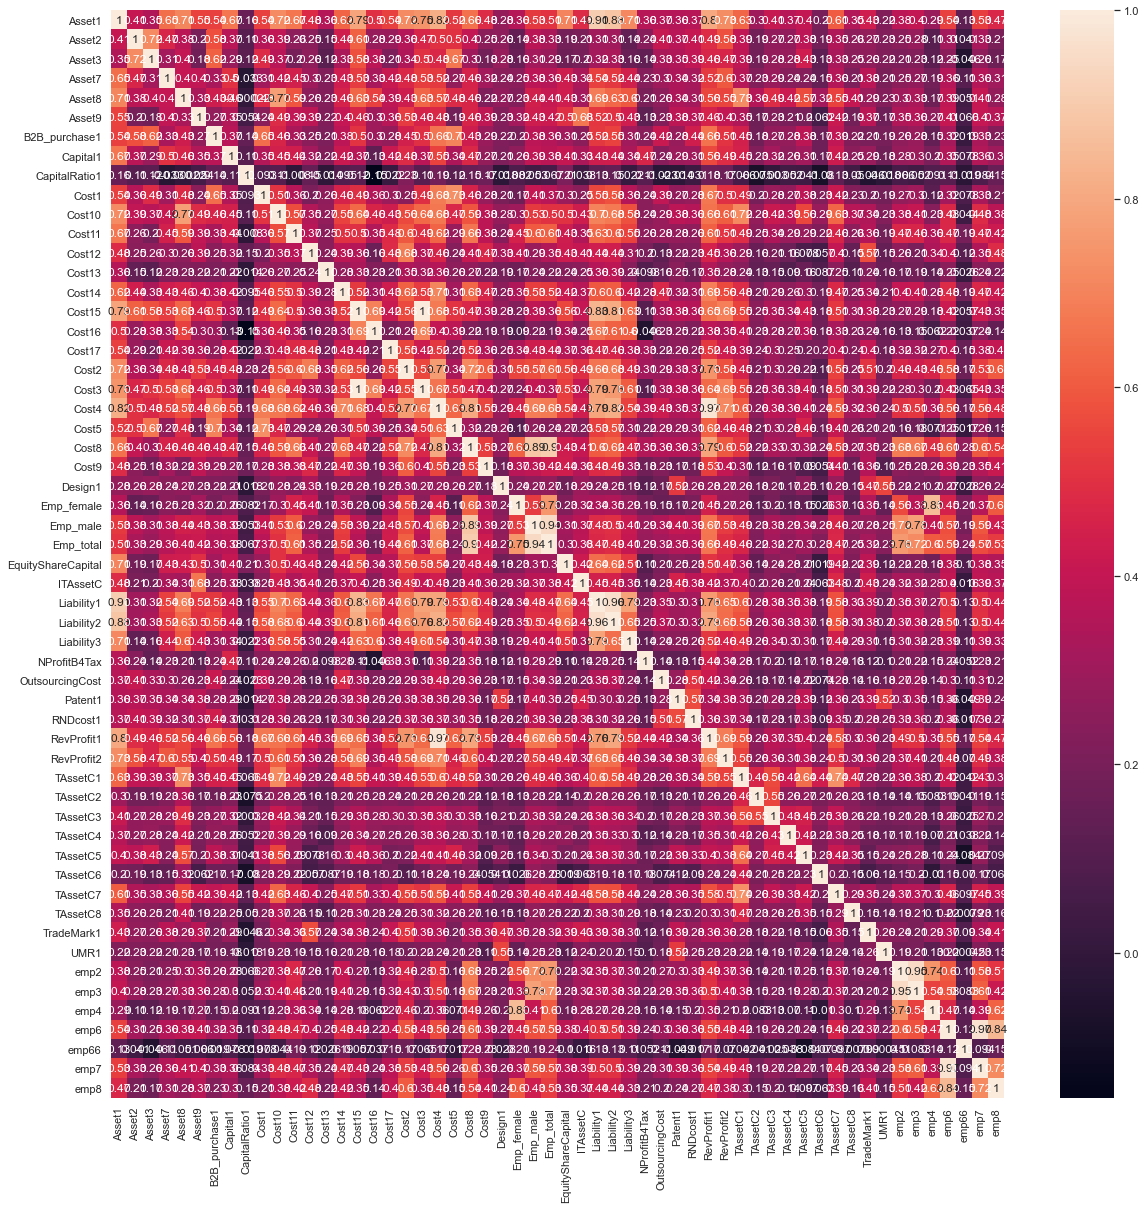

In [8]:
import seaborn as sns

corr = dft1_log.corr()  
sns.set(rc = {'figure.figsize':(20,20)})   # heatmap 사이즈 조절
sns.heatmap(data=corr, annot=True);

In [44]:
# dft1_log의 56개 변수 중 서로의 상관계수가 0.7미만인 변수 37개를 모음

cols2 = ['Asset2','Asset7','Asset9','B2B_purchase1','Capital1','CapitalRatio1','Cost1','Cost11','Cost12','Cost13',\
         'Cost14','Cost16','Cost17','Cost2','Cost9','Design1','Emp_total','EquityShareCapital','ITAssetC',\
         'Liability2','Liability3','NProfitB4Tax','OutsourcingCost','Patent1','RNDcost1','RevProfit2','TAssetC1',\
         'TAssetC2','TAssetC3','TAssetC4','TAssetC5','TAssetC6','TAssetC8','TradeMark1','UMR1','emp6','emp66']

df2_log = dft1_log[cols2]   # 이들 37개 변수를 df4_log 데이터프레임에 저장
df2_log.shape

(12417, 37)

In [45]:
df2_log = df2_log.drop("UMR1", axis=1)   # 데이터프레임에서 UMR1 변수 제거
df2_log.shape

(12417, 36)

In [46]:
# dtype이 category인 변수들 cols1 (위에서 이미 작성했으나 이해를 쉽게 하기 위해 다시 코드를 불러 옴)
cols1 = ['Area', 'Compensation1', 'Compensation2', 'Compensation3', 'Compensation4', 'EBizSystem2','EBizSystem3',\
        'EBizSystem4','EBizSystem5','EBizSystem6','EBizSystem7','EBizSystem8','EBizSystem9','EBizSystem10',\
        'EBizSystem11','EBizSystem12','Franchise1','IndCategory1', 'IndCategory2','NewEntry3',\
        'Outsourcing1', 'Outsourcing2', 'Outsourcing3', 'Outsourcing4', 'Outsourcing5', 'Outsourcing6',\
        'Outsourcing7','Outsourcing8', 'Outsourcing9', 'Outsourcing10', 'Outsourcing11', 'Outsourcing12',\
        'Outsourcing13','Overseas1','Overseas5','ParentCompany1','SAlliance1','StockMktListing','Subsidiary1']

In [47]:
df1_cat = df1[cols1]   # cols1에 있는 category변수 39개로 구성된 데이터프레임 df1_category 생성  
df1_cat.shape

(12417, 39)

In [48]:
df3_log_u = pd.concat([df2_log, df1_cat], axis = 1) # 두개 데이터프레임을 하나로 병합.
df3_log_u.shape   # df2_log의 컬럼수 36개에 df1_cat의 컬럼수 39개를 합쳐 총 75개 컬럼수를 가짐

(12417, 75)

In [49]:
df3_log_u.to_csv('2014DC1_log_u.csv', index=False)  